#                                                    LOS ANGELES

# Crime Rates

This portion gets the raw data for the crime rate.  Keep in mind that most of it is just data cleanup.

In [2]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Getting the URL for the JSON Request
city = "Los Angeles, California"

url = "https://odn.data.socrata.com/resource/h4kz-unyt.json?name=" + city

data = requests.get(url).json()

In [4]:
#Convert JSON to Dataframe

data_df = pd.DataFrame(data)

In [5]:
#Sorting the values by year
data_df = data_df.sort_values('year')

#Finding only the "rate" of the number of crimes, not the count, so that it's uniform city to city
crime_rate_df = data_df.loc[data_df['variable'] == 'rate']

crime_rate_df.head()

,crime_type,id,key,name,place_name,type,value,variable,year
47,Property crime,1600000US0644000,1600000US0644000--2006--Property crime--rate,"Los Angeles, California","Los Angeles, CA",place,2718.3973006517667,rate,2006
198,Violent crime,1600000US0644000,1600000US0644000--2006--Violent crime--rate,"Los Angeles, California","Los Angeles, CA",place,786.8631031936187,rate,2006
18,All Crimes,1600000US0644000,1600000US0644000--2006--All Crimes--rate,"Los Angeles, California","Los Angeles, CA",place,7071.250987574286,rate,2006
35,Arson,1600000US0644000,1600000US0644000--2006--Arson--rate,"Los Angeles, California","Los Angeles, CA",place,60.730179883514566,rate,2006
42,Burglary,1600000US0644000,1600000US0644000--2006--Burglary--rate,"Los Angeles, California","Los Angeles, CA",place,524.7902089339868,rate,2006


In [6]:
#Filtering down to only the Violent Crimes

violent_crime_df = crime_rate_df.loc[crime_rate_df['crime_type'] == 'Violent crime']

violent_crime_df = violent_crime_df.reset_index()
violent_crime_df.head()

,index,crime_type,id,key,name,place_name,type,value,variable,year
0,198,Violent crime,1600000US0644000,1600000US0644000--2006--Violent crime--rate,"Los Angeles, California","Los Angeles, CA",place,786.8631031936187,rate,2006
1,46,Violent crime,1600000US0644000,1600000US0644000--2007--Violent crime--rate,"Los Angeles, California","Los Angeles, CA",place,718.4108873121135,rate,2007
2,70,Violent crime,1600000US0644000,1600000US0644000--2008--Violent crime--rate,"Los Angeles, California","Los Angeles, CA",place,689.5235424262254,rate,2008
3,120,Violent crime,1600000US0644000,1600000US0644000--2009--Violent crime--rate,"Los Angeles, California","Los Angeles, CA",place,625.3936316376947,rate,2009
4,108,Violent crime,1600000US0644000,1600000US0644000--2010--Violent crime--rate,"Los Angeles, California","Los Angeles, CA",place,559.2305712018122,rate,2010


In [6]:
#Deleting repeat data (won't be the same for each city) and resetting the index  *********Important**********
#violent_crime_df = violent_crime_df.drop(index=213)
#violent_crime_df = violent_crime_df.reset_index()
#violent_crime_df

In [7]:
#Getting only the data we need
violent_crime_df = violent_crime_df[['year','crime_type', 'value', 'variable']]
violent_crime_df.head()

,year,crime_type,value,variable
0,2006,Violent crime,786.8631031936187,rate
1,2007,Violent crime,718.4108873121135,rate
2,2008,Violent crime,689.5235424262254,rate
3,2009,Violent crime,625.3936316376947,rate
4,2010,Violent crime,559.2305712018122,rate


In [12]:
#Converting the correct columns to numbers, not objects

violent_crime_df['year'] = pd.to_numeric(violent_crime_df['year'])
violent_crime_df['value'] = pd.to_numeric(violent_crime_df['value'])

violent_crime_df.to_csv('LA_Violent_Crime.csv')

Text(0, 0.5, 'Rate (Per 100,000 People)')

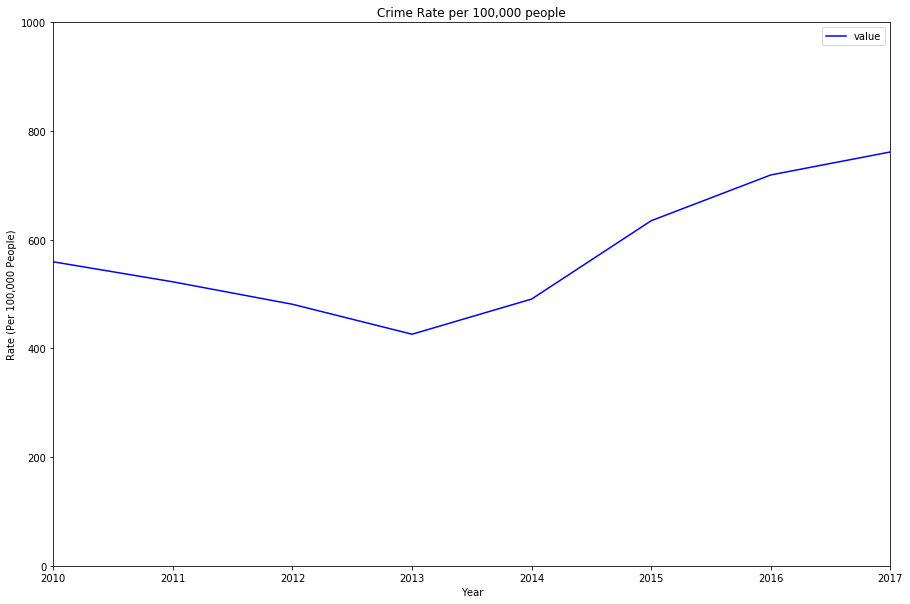

In [13]:
#Plot the graph
violent_crime_df.plot(kind='line', x='year', y='value', figsize=(15,10), color='blue')
plt.xlim(2010, 2017)
plt.ylim(0, 1000)
plt.title('Crime Rate per 100,000 people')
plt.xlabel('Year')
plt.ylabel('Rate (Per 100,000 People)')

# Education Rates

Getting the graduation rates from the same site, but creating my own CSV file manually in Excel

In [14]:
#Import and Read the CSV File
csv_file = 'LA_education.csv'

edu_data = pd.read_csv(csv_file)

#Turn it into a DataFrame
edu_df = pd.DataFrame(edu_data)

#edu_df

Text(0, 0.5, 'Graduation Rate')

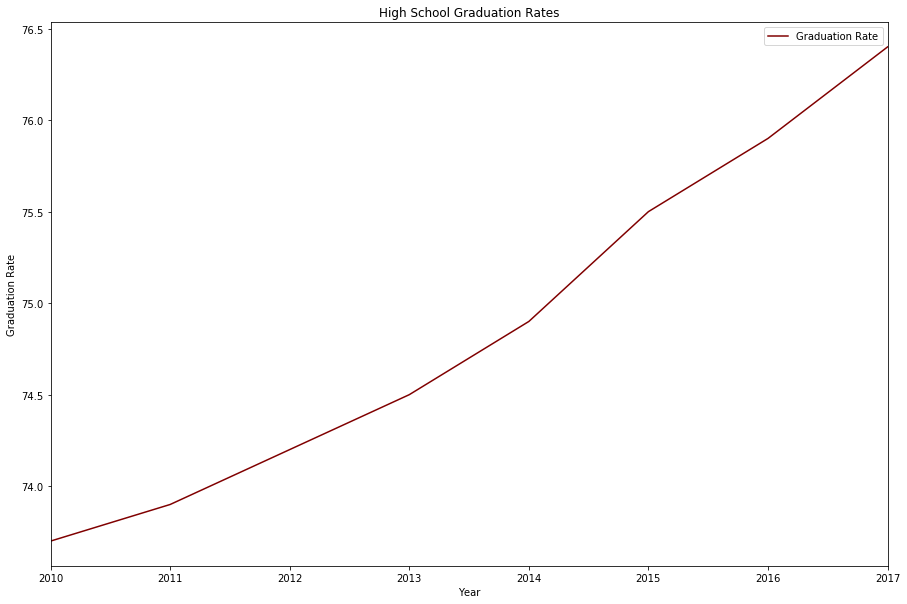

In [15]:
#Plot the graph
edu_df.plot(kind='line', x='Year', y='Graduation Rate', figsize=(15,10), color='maroon')
plt.title('High School Graduation Rates')
plt.xlabel('Year')
plt.ylabel('Graduation Rate')

# Income

Same process as the education rates.  Create your own CSV based on the website

In [16]:
#Import and Read the CSV File
csv_file = 'LA_income.csv'

income_data = pd.read_csv(csv_file)

#Turn it into a DataFrame
income_df = pd.DataFrame(income_data)

#income_df

In [17]:
#Sum the percentages together to get amount making below $25,000 (poverty)

income_df['% <25000'] = income_df['% 15000-24999'] + income_df['% 10000-14999'] + income_df['% <10000']
income_df

,Year,% 15000-24999,% 10000-14999,% <10000,Median Income,% <25000
0,2017,18.9,5.5,2.3,28794,26.7
1,2016,19.8,6.1,2.5,27101,28.4
2,2015,20.3,6.6,2.6,26505,29.5
3,2014,20.2,6.7,2.6,26295,29.5
4,2013,20.2,7.0,2.6,26151,29.8
5,2012,19.3,7.6,2.6,26446,29.5
6,2011,19.5,8.0,2.6,26530,30.1
7,2010,20.3,8.4,2.6,26239,31.3


In [18]:
#Get just the columns we need

poverty_df = income_df[['Year', '% <25000']]
poverty_df

,Year,% <25000
0,2017,26.7
1,2016,28.4
2,2015,29.5
3,2014,29.5
4,2013,29.8
5,2012,29.5
6,2011,30.1
7,2010,31.3


Text(0, 0.5, 'Percentage of Population')

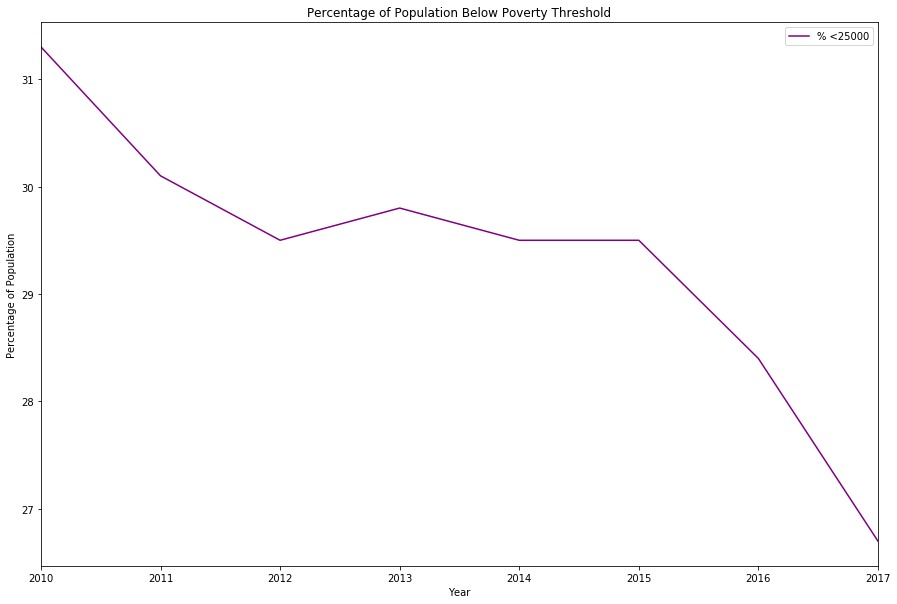

In [75]:
#Plot the Poverty Graph
poverty_df.plot(kind='line', x='Year', y='% <25000', figsize=(15,10), color='purple')
plt.title('Percentage of Population Below Poverty Threshold')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')

Text(0, 0.5, '$ Amount per Year')

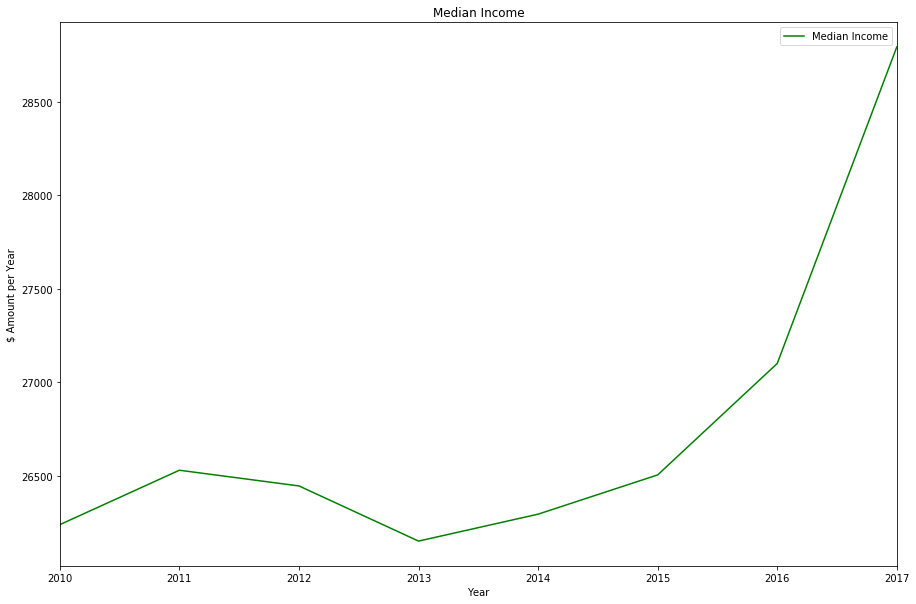

In [76]:
#Get the columns we need

median_income_df = income_df[['Year', 'Median Income']]

#Plot the Median Income Graph
median_income_df.plot(kind='line', x='Year', y='Median Income', figsize=(15,10), color='green')
plt.title('Median Income')
plt.xlabel('Year')
plt.ylabel('$ Amount per Year')

# Average House Price

In [86]:
#Import and Read the CSV File
csv_file = 'LA_average_house_price.csv'

house_data = pd.read_csv(csv_file)

#Turn it into a DataFrame
house_data_df = pd.DataFrame(house_data)

house_data_df

,Year,Price
0,2019,637500
1,2018,641300
2,2017,611900
3,2016,569700
4,2015,528400
5,2014,486700
6,2013,456500
7,2012,389400
8,2011,363100
9,2010,391200


(2010, 2017)

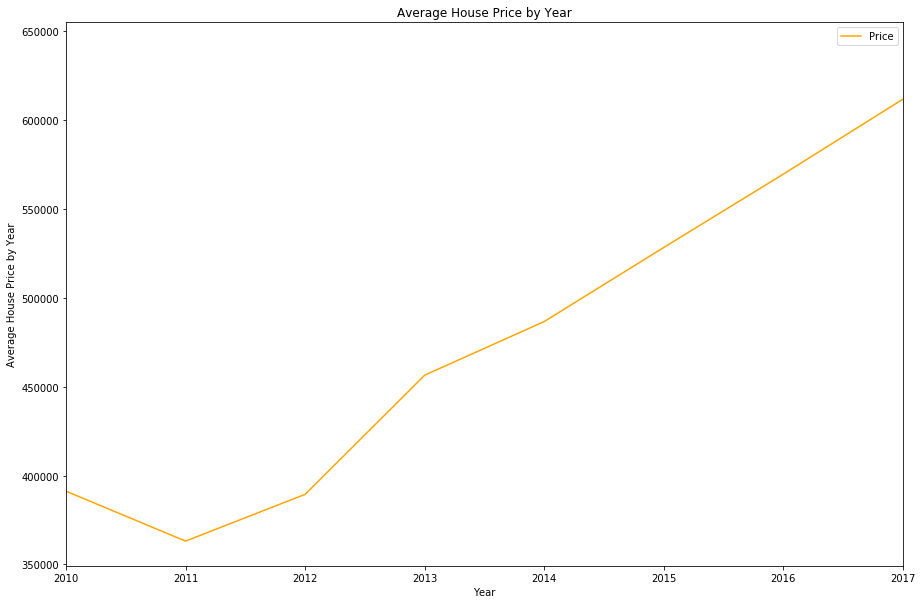

In [88]:
house_data_df.plot(kind='line', x='Year', y='Price', figsize=(15,10), color='orange')
plt.title('Average House Price by Year')
plt.xlabel('Year')
plt.ylabel('Average House Price by Year')
plt.xlim(2010, 2017)